<a href="https://colab.research.google.com/github/dashoraanjali15/AssignmentRepo/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import Data
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
#Evaluation
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [2]:

df = pd.read_excel("DS - Assignment Part 1 data set.xlsx")
print(df)

     Transaction date  House Age  Distance from nearest Metro station (km)  \
0         2012.916667       32.0                                  84.87882   
1         2012.916667       19.5                                 306.59470   
2         2013.583333       13.3                                 561.98450   
3         2013.500000       13.3                                 561.98450   
4         2012.833333        5.0                                 390.56840   
..                ...        ...                                       ...   
409       2013.000000       13.7                                4082.01500   
410       2012.666667        5.6                                  90.45606   
411       2013.250000       18.8                                 390.96960   
412       2013.000000        8.1                                 104.81010   
413       2013.500000        6.5                                  90.45606   

     Number of convenience stores  latitude  longitude  Number 

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.shape

(414, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [7]:
df['Price'] = df['House size (sqft)']* df['House price of unit area']
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1
...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,12366.2
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,63900.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,20421.8
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,31342.5


In [8]:
df['Number of bedrooms'].unique()

array([1, 2, 3])

Visualizing house prices

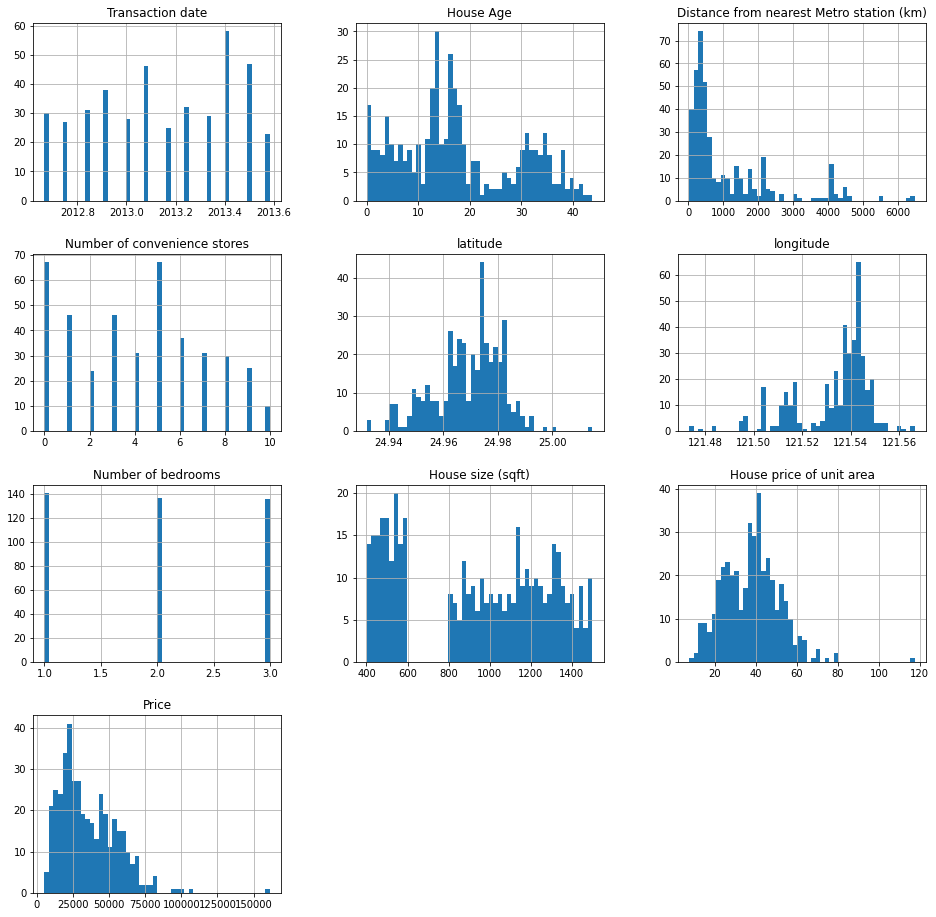

In [9]:
df.hist(bins=50, figsize=(16,16))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


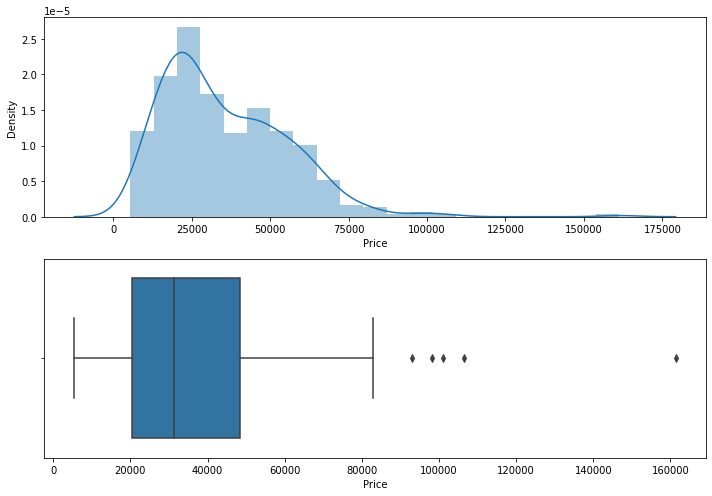

In [10]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['Price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['Price'])
plt.tight_layout()

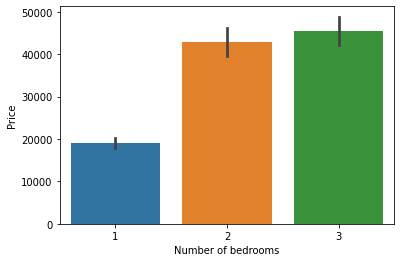

In [11]:
sns.barplot(x=df['Number of bedrooms'] , y = df['Price'])

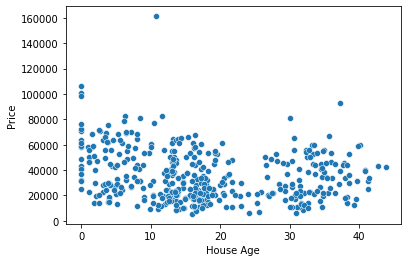

In [12]:
sns.scatterplot(x=df['House Age'] , y = df['Price'],data= df)

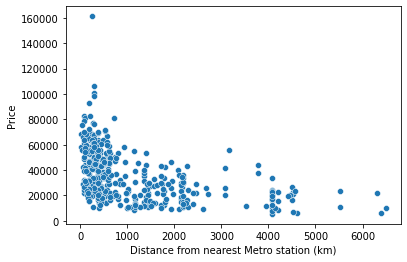

In [13]:
sns.scatterplot(x=df['Distance from nearest Metro station (km)'] , y = df['Price'],data= df)

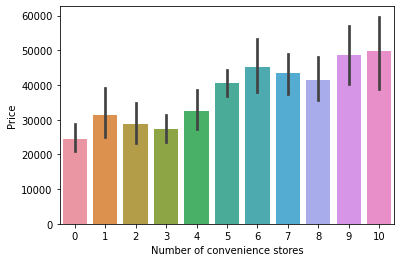

In [14]:
sns.barplot(x=df['Number of convenience stores'] , y = df['Price'])

Text(0, 0.5, 'TARGET(PRICE_IN_LACS)')

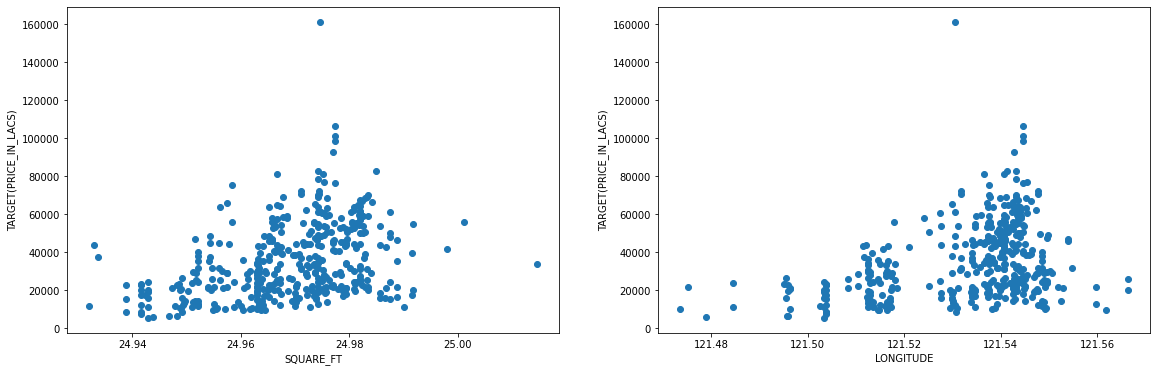

In [15]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(df['latitude'], df['Price'])
plt.xlabel('SQUARE_FT')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.subplot(132)
plt.scatter(df['longitude'], df['Price'])
plt.xlabel('LONGITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')


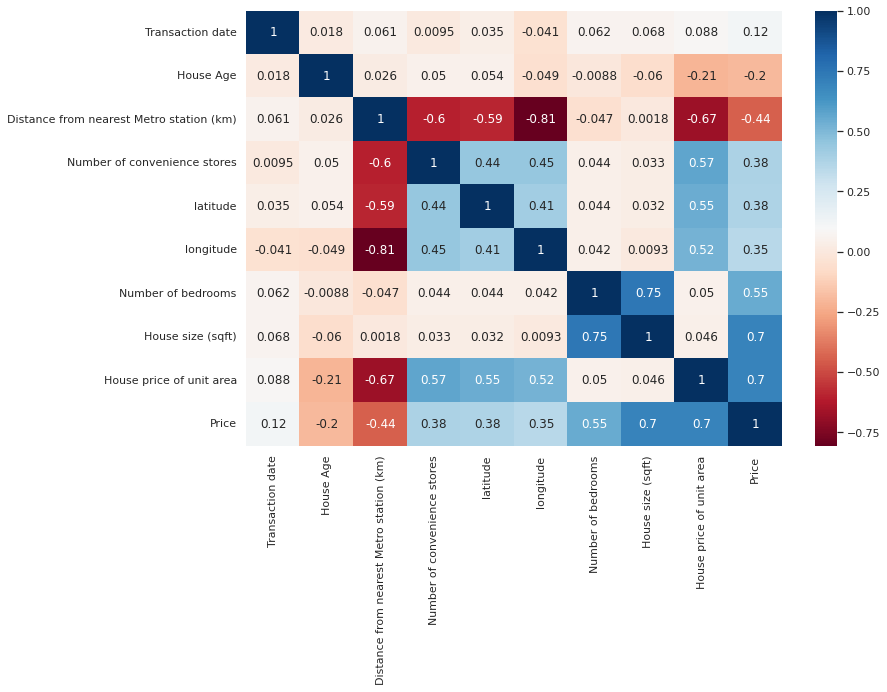

In [16]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.corr(), annot=True,cmap='RdBu')
plt.show()

In [17]:
#removing outliers
#typical 1 bedroom appartment shoul be not less than  300 so we checking this condition and removing outliears

In [18]:
df[df['House size (sqft)']/df['Number of bedrooms']<300].head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
5,2012.666667,7.1,2175.0300,3,24.96305,121.51254,3,828,32.1,26578.8
47,2013.583333,35.9,640.7391,3,24.97563,121.53715,3,867,61.5,53320.5
56,2013.416667,33.6,371.2495,8,24.97254,121.54059,3,883,41.9,36997.7
87,2013.583333,16.9,4066.5870,0,24.94297,121.50342,3,878,18.3,16067.4
97,2013.083333,28.4,617.4424,3,24.97746,121.53299,3,828,34.6,28648.8


In [19]:
df1=df[~df['House size (sqft)']/df['Number of bedrooms']<300]

In [20]:
df1.shape

(414, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

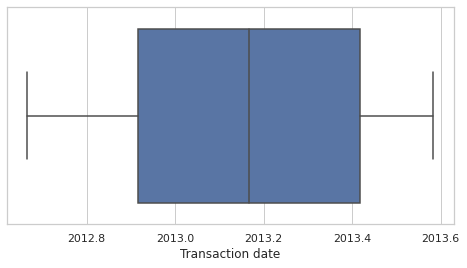

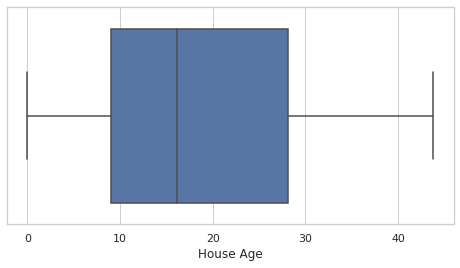

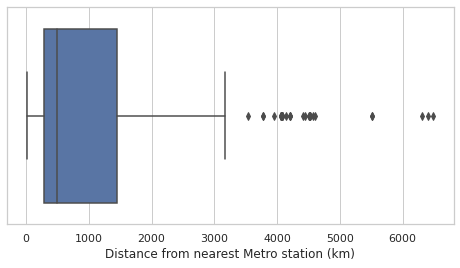

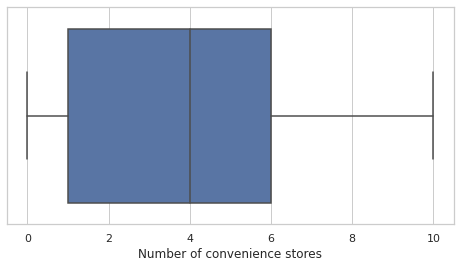

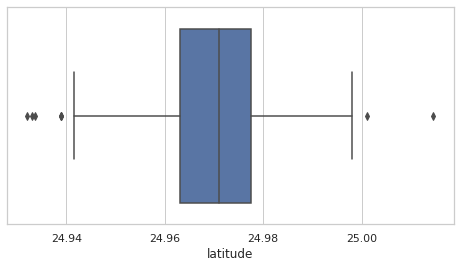

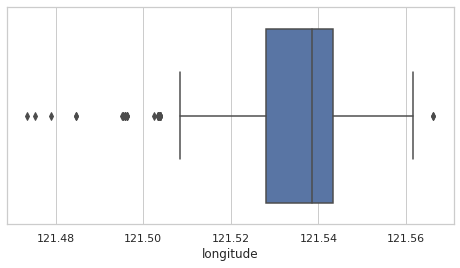

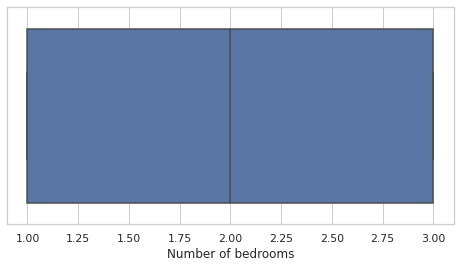

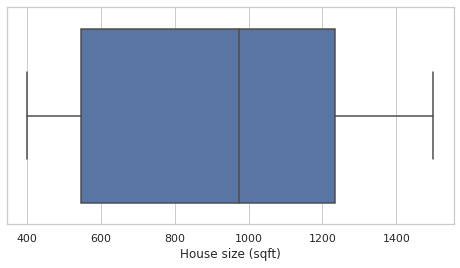

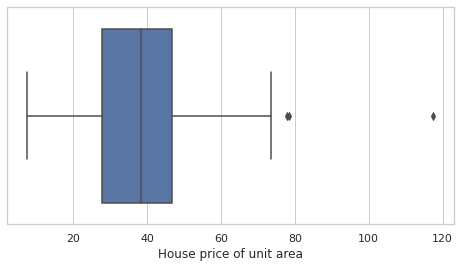

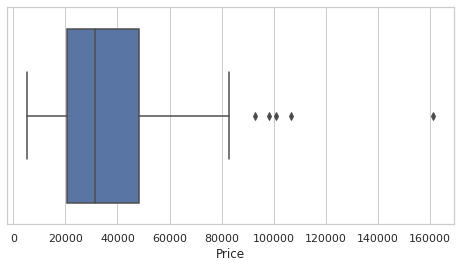

In [21]:
numerical_df =df1.select_dtypes(exclude=['object'])

for column in numerical_df:
    plt.figure(figsize=(8, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])


In [22]:
X = df.drop(["Transaction date",'House price of unit area',	'Price'], axis=1)
y = df[['Price']]

In [23]:
X

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,32.0,84.87882,10,24.98298,121.54024,1,575
1,19.5,306.59470,9,24.98034,121.53951,2,1240
2,13.3,561.98450,5,24.98746,121.54391,3,1060
3,13.3,561.98450,5,24.98746,121.54391,2,875
4,5.0,390.56840,5,24.97937,121.54245,1,491
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803
410,5.6,90.45606,9,24.97433,121.54310,2,1278
411,18.8,390.96960,7,24.97923,121.53986,1,503
412,8.1,104.81010,5,24.96674,121.54067,1,597


In [24]:
y


,Price
0,21792.5
1,52328.0
2,50138.0
3,47950.0
4,21162.1
...,...
409,12366.2
410,63900.0
411,20421.8
412,31342.5


Linear regression

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5880327306710338

In [28]:
linear_predictions = model.predict(X_test)

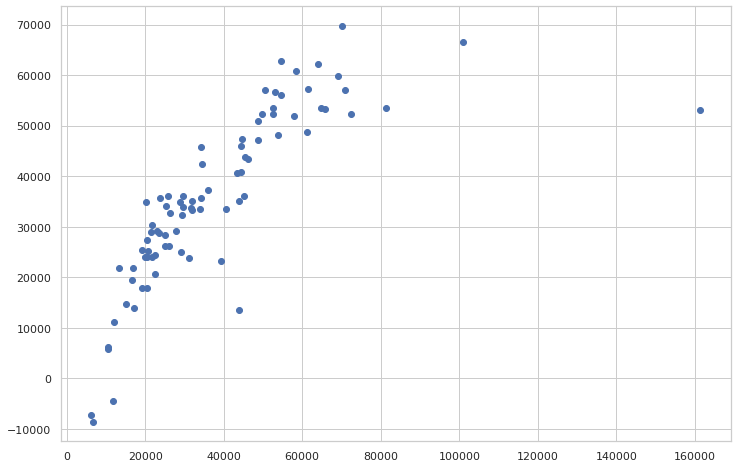

In [29]:
plt.scatter(y_test, linear_predictions)
plt.show()


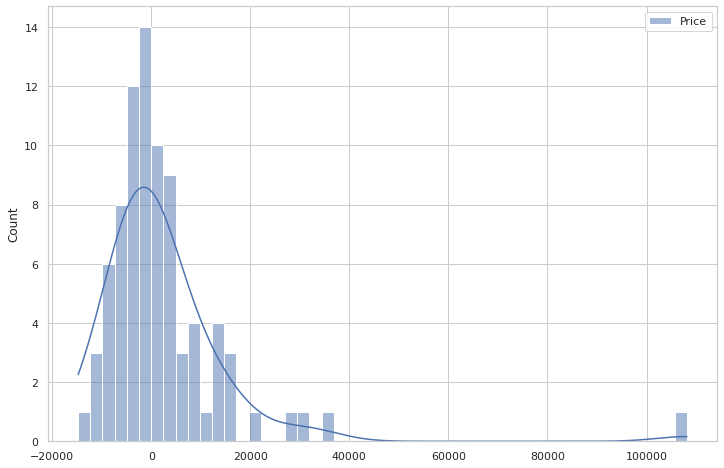

In [30]:
sns.histplot((y_test-linear_predictions ),bins=50,kde=True)

In [31]:

from sklearn.model_selection import train_test_split
print("MAE:", metrics.mean_absolute_error(y_test, linear_predictions))
print('MSE:', metrics.mean_squared_error(y_test, linear_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linear_predictions)))

#Accuracy
print("\nAccuracy : {}".format(model.score(X_test,y_test)))

MAE: 7699.4516657665245
MSE: 224286383.68249908
RMSE: 14976.193898400858

Accuracy : 0.5880327306710338


Decision tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
tree_predictions = tree.predict(X_test)

In [34]:
print("MAE:", metrics.mean_absolute_error(y_test, tree_predictions))
print('MSE:', metrics.mean_squared_error(y_test, tree_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_predictions)))

#Accuracy
print("\nAccuracy : {}".format(tree.score(X_test,y_test)))

MAE: 8275.936144578314
MSE: 206454583.35385537
RMSE: 14368.52752907741

Accuracy : 0.6207860256682455


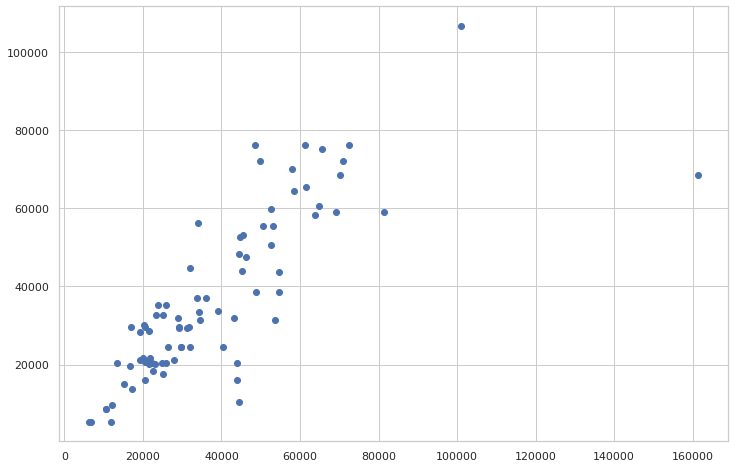

In [35]:
plt.scatter(y_test, tree_predictions)
plt.show()


XGboost classifier

In [36]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[05:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [37]:
y_pred_xgb = xgb.predict(X_test)

In [38]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_xgb))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

#Accuracy
print("\nAccuracy : {}".format(xgb.score(X_test,y_test)))

MAE: 5740.858471385542
RMSE: 12634.378832748975

Accuracy : 0.7067975507839644


Gradient boost

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor()
boost.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [40]:
y_pred_boost = boost.predict(X_test)

In [41]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_boost))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_boost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_boost)))

#Accuracy
print("\nAccuracy : {}".format(boost.score(X_test,y_test)))

MAE: 5487.252819597616
MSE: 158359526.45578
RMSE: 12584.098158222543

Accuracy : 0.7091266058372565


Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [43]:
y_pred_forest = forest.predict(X_test)

In [44]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_forest))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_forest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))

#Accuracy
print("\nAccuracy : {}".format(forest.score(X_test,y_test)))

MAE: 5684.368180722889
MSE: 163516593.1613769
RMSE: 12787.360680037804

Accuracy : 0.6996541507841687


feature: 0, score: 0.05651
feature: 1, score: 0.26479
feature: 2, score: 0.01220
feature: 3, score: 0.06737
feature: 4, score: 0.03197
feature: 5, score: 0.00356
feature: 6, score: 0.56360


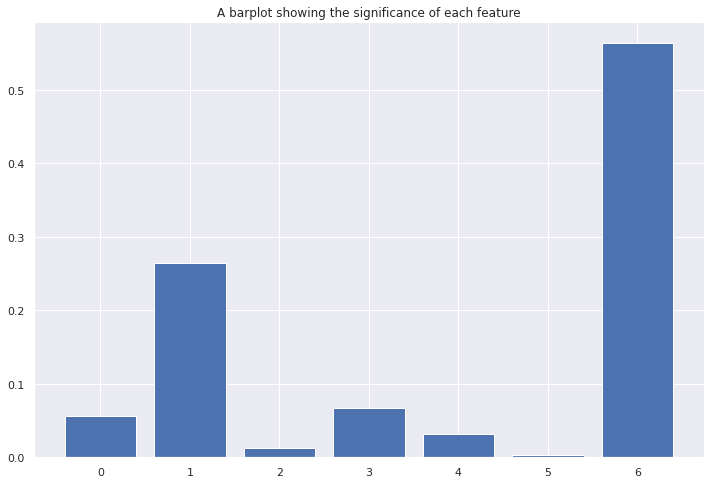

In [45]:
importance = forest.feature_importances_
for i, v in enumerate(importance):
    print('feature: %d, score: %.5f' %(i, v))
sns.set()
plt.bar([x for x in range(len(importance))], importance)
plt.title("A barplot showing the significance of each feature")
plt.show()